In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
# Área, las cuatro son iguales
A = .0025 #m^2 
h = 100 # W/m^2C

e1 = {'x':[0.00,0.00,0.05],
      'y':[0.00,0.10,0.05],
      'n':[0,1,2]}

e2 = {'x':[0.00,0.10,0.05],
      'y':[0.10,0.10,0.05],
      'n':[1,3,2]}

e3 = {'x':[0.00,0.05,0.10],
      'y':[0.00,0.05,0.00],
      'n':[0,2,4]}

e4 = {'x':[0.10,0.05,0.10],
      'y':[0.00,0.05,0.10],
      'n':[4,2,3]}


elementos = [e1, e2, e3, e4]

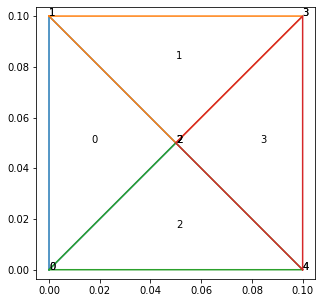

In [3]:
i = 0
n = 0

plt.figure(figsize=(5,5))

for e in elementos:
    plt.plot(e['x']+[e['x'][0]],e['y']+[e['y'][0]])
    x = np.array(e['x']).mean()
    y = np.array(e['y']).mean()
    plt.text(x,y,i)
    for x, y, n in zip(e['x'],e['y'],e['n']):
         plt.text(x,y,n)
    n = max(n, max(e['n']))
    i = i + 1
    
plt.axis('equal')
plt.show()

In [4]:
for e in elementos:
    e.update(A=A)
    e.update(b1=e['y'][1]-e['y'][2])
    e.update(c1=e['x'][2]-e['x'][1])
    e.update(b2=e['y'][2]-e['y'][0])
    e.update(c2=e['x'][0]-e['x'][2])
    e.update(b3=e['y'][0]-e['y'][1])
    e.update(c3=e['x'][1]-e['x'][0])

In [5]:
e

{'x': [0.1, 0.05, 0.1],
 'y': [0.0, 0.05, 0.1],
 'n': [4, 2, 3],
 'A': 0.0025,
 'b1': -0.05,
 'c1': 0.05,
 'b2': 0.1,
 'c2': 0.0,
 'b3': -0.05,
 'c3': -0.05}

In [7]:
for e in elementos:
    K = np.zeros((3,3))
    for i in range(0,3):
        for j in range(0,3):
            K[i,j] = e['b{}'.format(i+1)]*e['b{}'.format(j+1)]+e['c{}'.format(i+1)]*e['c{}'.format(j+1)]
    K = 50 / 4 / e['A'] * K
    e.update({'K':K})
    F = np.array([0,0,0])
    e.update({'F':F})
    print(e)
   

{'x': [0.0, 0.0, 0.05], 'y': [0.0, 0.1, 0.05], 'n': [0, 1, 2], 'A': 0.0025, 'b1': 0.05, 'c1': 0.05, 'b2': 0.05, 'c2': -0.05, 'b3': -0.1, 'c3': 0.0, 'K': array([[ 25.,   0., -25.],
       [  0.,  25., -25.],
       [-25., -25.,  50.]]), 'F': array([0, 0, 0])}
{'x': [0.0, 0.1, 0.05], 'y': [0.1, 0.1, 0.05], 'n': [1, 3, 2], 'A': 0.0025, 'b1': 0.05, 'c1': -0.05, 'b2': -0.05, 'c2': -0.05, 'b3': 0.0, 'c3': 0.1, 'K': array([[ 25.,   0., -25.],
       [  0.,  25., -25.],
       [-25., -25.,  50.]]), 'F': array([0, 0, 0])}
{'x': [0.0, 0.05, 0.1], 'y': [0.0, 0.05, 0.0], 'n': [0, 2, 4], 'A': 0.0025, 'b1': 0.05, 'c1': 0.05, 'b2': 0.0, 'c2': -0.1, 'b3': -0.05, 'c3': 0.05, 'K': array([[ 25., -25.,   0.],
       [-25.,  50., -25.],
       [  0., -25.,  25.]]), 'F': array([0, 0, 0])}
{'x': [0.1, 0.05, 0.1], 'y': [0.0, 0.05, 0.1], 'n': [4, 2, 3], 'A': 0.0025, 'b1': -0.05, 'c1': 0.05, 'b2': 0.1, 'c2': 0.0, 'b3': -0.05, 'c3': -0.05, 'K': array([[ 25., -25.,   0.],
       [-25.,  50., -25.],
       [  0., 

In [8]:
# Condiciones de frontera

H1 = 100 * 0.1 /6 * np.array([[2,1,0],[1,2,0],[0,0,0]])

e1['K'] = e1['K'] + H1

In [9]:
F1 = 100 * 400 * 0.1 / 2 * np.array([1,1,0])

e1['F'] = e1['F'] + F1

In [10]:
print(e1['K'])

[[ 28.33333333   1.66666667 -25.        ]
 [  1.66666667  28.33333333 -25.        ]
 [-25.         -25.          50.        ]]


In [11]:
#Ensamble de la matriz de conducxtividad
K = np.zeros((n+1,n+1))
F = np.zeros((n+1))

for e in elementos:
    for i, j in enumerate(e['n']):
        for k, m in enumerate(e['n']):
            #print(j,m)
            K[j,m] = K[j,m] + e['K'][i,k]
        F[j] = F[j] + e['F'][i]

sp.Matrix(K)

⎡53.3333333333333  1.66666666666667  -50.0   0.0    0.0 ⎤
⎢                                                       ⎥
⎢1.66666666666667  53.3333333333333  -50.0   0.0    0.0 ⎥
⎢                                                       ⎥
⎢     -50.0             -50.0        200.0  -50.0  -50.0⎥
⎢                                                       ⎥
⎢      0.0               0.0         -50.0  50.0    0.0 ⎥
⎢                                                       ⎥
⎣      0.0               0.0         -50.0   0.0   50.0 ⎦

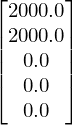

In [11]:
sp.Matrix(F)

In [12]:
# Condición La temperatura conocida

Tf = np.array([None] * int(n+1), dtype=np.float)

Tf[3] = 100
Tf[4] = 100

Tf

C:\Users\uie70742\AppData\Local\Temp/ipykernel_47272/2505593965.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Tf = np.array([None] * int(n+1), dtype=np.float)


array([ nan,  nan,  nan, 100., 100.])

In [13]:
for i, t in enumerate(Tf):
    if not np.isnan(t):
        for j in range(n+1):
            K[i,j] = 0
            if i == j:
                K[i,j] = 1
            F[i] = t
            
sp.Matrix(K)

⎡53.3333333333333  1.66666666666667  -50.0   0.0    0.0 ⎤
⎢                                                       ⎥
⎢1.66666666666667  53.3333333333333  -50.0   0.0    0.0 ⎥
⎢                                                       ⎥
⎢     -50.0             -50.0        200.0  -50.0  -50.0⎥
⎢                                                       ⎥
⎢      0.0               0.0          0.0    1.0    0.0 ⎥
⎢                                                       ⎥
⎣      0.0               0.0          0.0    0.0    1.0 ⎦

In [14]:
F

array([2000., 2000.,    0.,  100.,  100.])

In [ ]:
# K*T = F

In [15]:
T = np.linalg.solve(K,F)
sp.Matrix(T)

⎡150.0⎤
⎢     ⎥
⎢150.0⎥
⎢     ⎥
⎢125.0⎥
⎢     ⎥
⎢100.0⎥
⎢     ⎥
⎣100.0⎦

## 14 de noviembre examen 2